# A/B Testing

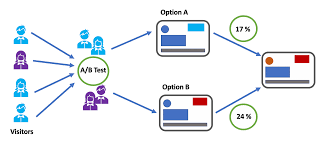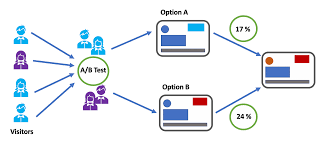

## Few questions before we start

#### -->Define A/B Testing? When to use it? 
In an A/B test, a sample of consumers are shown the product's variant (the experimental group), while a different sample of customers are shown the product's standard version (the control group). The performance of the product is then compared between the experimental/treatment group and the control group to determine the impact of the new version(s) of the product on that performance. The objective is to monitor the metric during the test period in order to determine whether there has been a change in the product's performance and, if so, what kind of change there has been.

#### -->Questions to ask before any A/B test
- What demographics would make up a sample population, and which market groups would buy the desired product?
- Can we use exploratory/historical data analysis to answer our business question (for example, by employing causal analysis)?
- Do you wish to test one or more target product variants?
- Can we guarantee that the control and experimental groups are properly randomized, and that both samples are a fair and accurate representative of the actual user population?
- Can the validity of the treatment vs. control effects be guaranteed during the entire test?

#### -->Choosing primary metric for the A/B test
Since revenue is not necessarily the end aim, we must link the key indicator for the A/B test to the product's immediate and long-term objectives. It is assumed that if a product is more profitable, the content must be excellent. But in order to accomplish that, one need to improve the conversion funnels rather than the writing and material's overall substance. Going back to the specific issue you want to tackle could be one approach to determine whether the statistic you used for your A/B test is accurate.

Metric Validity Question: *If this chosen metric were to increase significantly while everything else stays constant, would we achieve our goal and address the problem?*

#### --> what are the common A/B test metrics

**Click-Through Rate (CTR) for usage**

Click-Through Rate (CTR) (%) = (Number of Clicks / Number of Impressions) * 100



 **Click-Through Probability (CTP) for impact**

Click-Through Probability (CTP) = Number of Clicks / Number of Impressions

*Unlike the CTR, the CTP does take into account the duplicate clicks which means that if a user for some reason has performed multiple clicks, in a single session, on the same item for some reason (e.g. because of impatience), this multiple clicks is counted as a single click in CTP.*



**Conversion Rate**

Conversion Rate (%) = (Number of conversion / Total Number of Visitors) * 100

*conversion indicates any desired action like purchased, clicks,visits etc.*

#### --> What can be Minimum Detectable Effect (delta)
 It represents the smallest change or effect that the business is interested in detecting. In other words, it's the minimum improvement or difference that the business cares about. If the observed effect (result) is smaller than the MDE, it may not be meaningful enough to influence decision-making.

#### --> What is the minimum sample size
Calculation of the sample size depends on the underlying primary metric that you have chosen for tracking the progress of the control and experimental versions.

#### --> What should be the duration of A/B test

This question needs to be answered before you run your experiment not during, by trying to stop the test when you detect statistical significance. To determine the baseline of a duration time, a common approach is to use the following formula: Duration= N/(No. of users per day)

##### Too small test duration: Novelty Effects
Users tend to react quickly and positively to all types of changes independent of their nature. This positive effect to the experimental version that is entire since there is a change, regardless of what the change is, is referred to as novelty effect and it wears off in time and is thus considered “illusory”. So, it would be wrong to describe this effect to the experimental version itself and to expect that it will continue to persist after the novelty effect wears off.

##### Too large test duration: Maturation Effects
It is typically beneficial to take into account a longer test length when planning an A/B test in order to give people time to become acquainted to the new feature or product. By giving returning consumers more time to calm down after an initial positive reaction or spike in interest caused by a change that was implemented as part of a treatment, one would be able to assess the true treatment effect. This should lessen the novelty impact and improve the test's ability to predict results. However, the longer the test duration, the greater the chance that other factors will affect how consumers respond and perhaps taint the test results (maturation effect). 

##### **For practice purpose we are just going to generate fake data which has better conversion rate for the updated interface**

In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
from math import ceil

In [17]:
import pandas as pd
import random
from datetime import datetime, timedelta

random.seed(42)
n_rows = 1000

data = {
    'serial_no.': range(1, n_rows+1),
    'user_id': [f'user_{i}' for i in range(1, n_rows+1)],
    'date_day': [datetime(2023, 8, 1) + timedelta(days=random.randint(0, 30)) for _ in range(n_rows)],
    'time': [f'{random.randint(0, 23):02d}:{random.randint(0, 59):02d}' for _ in range(n_rows)],
    'landing_page': (['A'] * 500) + (['B'] * 500),
    'seconds_spent': [random.randint(10, 180) for _ in range(n_rows)],
    'clicked': [random.choice([0, 1]) for _ in range(n_rows)],
    'purchased': [
        1 if clicked == 1 and (landing_page == 'B' and random.random() < 0.4 or landing_page == 'A' and random.random() < 0.2)
        else 0
        for clicked, landing_page in zip([random.choice([0, 1]) for _ in range(n_rows)], (['A'] * 500) + (['B'] * 500))
    ]
}

df = pd.DataFrame(data)



In [18]:
df.head(10)
purchase_rates = df.groupby('landing_page')['purchased'].mean()
print("Purchase Rates:")
print(purchase_rates)

Purchase Rates:
landing_page
A    0.110
B    0.202
Name: purchased, dtype: float64


##### we can already see that the landing page B has better purchase rate

In [5]:
import xml.etree.ElementTree as ET


In [19]:
root = ET.Element("data")
for index, row in df.iterrows():
    entry = ET.SubElement(root, "entry")
    for col_name, value in row.items():
        ET.SubElement(entry, col_name).text = str(value)

tree = ET.ElementTree(root)

xml_filename = 'fake_data.xml'
tree.write(xml_filename)

print(f"XML file '{xml_filename}' created successfully for the genrated data.")

XML file 'fake_data.xml' created successfully for the genrated data.


In [7]:
print(df.shape)

(1000, 8)


In [8]:
df.head(10)

,serial_no.,user_id,date_day,time,landing_page,seconds_spent,clicked,purchased
0,1,user_1,2023-08-21,13:16,A,131,0,0
1,2,user_2,2023-08-04,02:30,A,142,0,0
2,3,user_3,2023-08-01,00:47,A,126,1,1
3,4,user_4,2023-08-24,17:03,A,48,1,0
4,5,user_5,2023-08-09,11:14,A,165,0,0
5,6,user_6,2023-08-08,20:04,A,141,1,0
6,7,user_7,2023-08-08,20:02,A,45,0,0
7,8,user_8,2023-08-05,00:15,A,93,1,0
8,9,user_9,2023-08-24,06:53,A,166,0,0
9,10,user_10,2023-08-04,00:39,A,91,0,0


##### Note that the generated data in not accurate as the real world data, the only assumption we have taken is that there are more conversion rates in landing page B that landing page A.
##### The real world data can have different number of users spending different amount of time in that particular landing page and might be visible in the form of pattern.

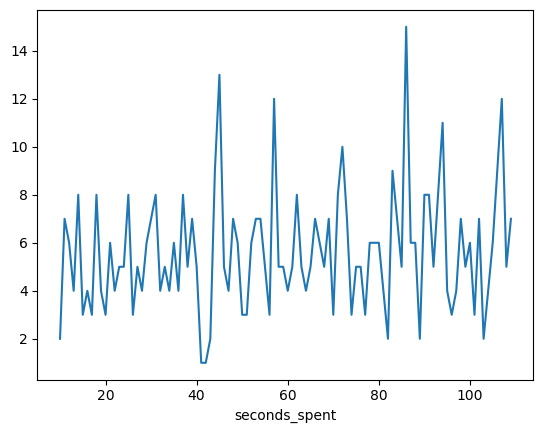

In [9]:
plot_df = df.groupby("seconds_spent")["purchased"].count()

ax = plot_df.head(100).plot()

##### Since this is the generated data therefore the above plot is random

In [10]:
import warnings
warnings.filterwarnings('ignore')

##### The below code shows hypothesis testing using both the Chi-squared test for independence and the Z-test for comparing proportions.

In [11]:
from scipy.stats import chi2_contingency
from scipy.stats import norm

df = pd.read_csv('fake_data.csv')

contingency_table = pd.crosstab(df['landing_page'], df['purchased'])

chi2, p, _, _ = chi2_contingency(contingency_table)

p_a = df[df['landing_page'] == 'A']['purchased'].mean()
p_b = df[df['landing_page'] == 'B']['purchased'].mean()
n_a = len(df[df['landing_page'] == 'A'])
n_b = len(df[df['landing_page'] == 'B'])
p_combined = (p_a * n_a + p_b * n_b) / (n_a + n_b)
test_statistic = (p_b - p_a) / (p_combined * (1 - p_combined) * (1 / n_a + 1 / n_b)) ** 0.5

p_value = 1 - norm.cdf(test_statistic)

print("Chi-squared test:")
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

print("\nZ-test for proportions:")
print(f"Test statistic: {test_statistic}")
print(f"P-value: {p_value}")


Chi-squared test:
Chi-squared statistic: 15.380058330295297
P-value: 8.79111873073015e-05

Z-test for proportions:
Test statistic: 4.008891563617293
P-value: 3.0502209683369585e-05


### Conclusion
##### The above code calculates the chi-square test  and z-test, chi-square test helps you determine if the observed differences in purchase rates are statistically significant or if they could have occurred due to random chance. If the chi-square test produces a low p-value, it suggests that there is a significant relationship between the landing page and purchase behavior, indicating that the landing page might have an impact on purchase decisions.

##### The Z-test statistic measures how many standard deviations the observed difference in sample proportions is away from the expected difference under the null hypothesis that the proportions are equal. If the Z-test statistic is large, it indicates that the observed difference is unlikely to have occurred by chance alone, and therefore, you might reject the null hypothesis.

##### In the above code resullts in the very low value of p-value ie. less than 0.005 and high z-test value which concudes that we can easily reject null hypothesis.

### Miscellaneous

##### The below are the different type of test which is not required for now but still mentioned that these exists.

In [12]:
import statsmodels.stats.api as sms
from scipy.stats import shapiro, levene, mannwhitneyu

test_stat, pvalue = shapiro(df.loc[df["landing_page"] == "A", "purchased"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 1.9833014370710005e-38
test_stat: 0.3609798550605774


In [13]:
test_stat, pvalue = shapiro(df.loc[df["landing_page"] == "B", "purchased"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 2.1894074464927327e-35
test_stat: 0.4919142723083496


In [14]:
test_stat, pvalue = levene(df.loc[df["landing_page"] == "B", "purchased"],
                           df.loc[df["landing_page"] == "A", "purchased"])
print("p-value:",pvalue)
print("test_stat:",test_stat)

p-value: 5.817164338905031e-05
test_stat: 16.30104671627505


In [15]:
test_stat, pvalue = mannwhitneyu(df.loc[df["landing_page"] == "B", "purchased"],
                                 df.loc[df["landing_page"] == "A", "purchased"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 136500.0000, p-value = 0.0001


##### The above test is conducted by fake data which was very straight forward, the real world data will have many complexity and might take many any test than the above one.

#### The End